In [11]:
from modules.validator import Validator
from modules.eda_class_native import run_eda, standardize_runs_df, df_runid_summary #, Validator
from modules.constants_settings import ConstantsSettings as CS
import pandas as pd
from modules.data_import import infer_source_files_technology, read_references_filter

In [12]:

METADATA_DIR = "benchmark_metadata/"
INTERMEDIATE_OUTPUT_DIR= "analysis_data/"
OUTPUT_DIR = "output/"
INPUT_DIR = "benchmark_data/"
technology= CS.TECHNOLOGY_illumina # options minion, illumina


In [13]:

all_reports_file, all_parameters_file, all_references_file, validation_file= infer_source_files_technology(technology, INPUT_DIR, METADATA_DIR)
raw_refs= read_references_filter(all_references_file, benchmark_prefix="benchmark_batch")

## validation data
validator = Validator(validation_file, raw_refs)

### summary data
eda_runs = run_eda(validator, all_reports_file, all_parameters_file, 
                   INTERMEDIATE_OUTPUT_DIR)

### pre-processing
eda_runs.split()
eda_runs.combine_data()

full_data = eda_runs.combdat
dataset_success = eda_runs.get_combd_data_success()
sources = eda_runs.sources


In [14]:

method= "none"
combdat_full_process = standardize_runs_df(eda_runs.combdat, method= method) ##
run_assess = df_runid_summary(combdat_full_process, INTERMEDIATE_OUTPUT_DIR, technology=technology)


In [16]:
#####
### generate benchmark tree, calculate scores
from modules.benchmark_graph_utils import pipeline_tree, tree_plot

pipe_tree = pipeline_tree(INTERMEDIATE_OUTPUT_DIR)
pipe_tree.param_input(technology)
pipe_tree.create_pipe_tree()

inter_scores= pipe_tree.calculate_node_scores_with_source_subset_draw(
    eda_runs.softs, run_assess, cv= 100, subset=.7)


/home/bioinf/Desktop/INSA/Manuscript/Manuscript_TELEVIR/BENCHMARK_EDA/modules/benchmark_graph_utils.py:190: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/bioinf/Desktop/INSA/Manuscript/Manuscript_TELEVIR/BENCHMARK_EDA/modules/benchmark_graph_utils.py:194: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



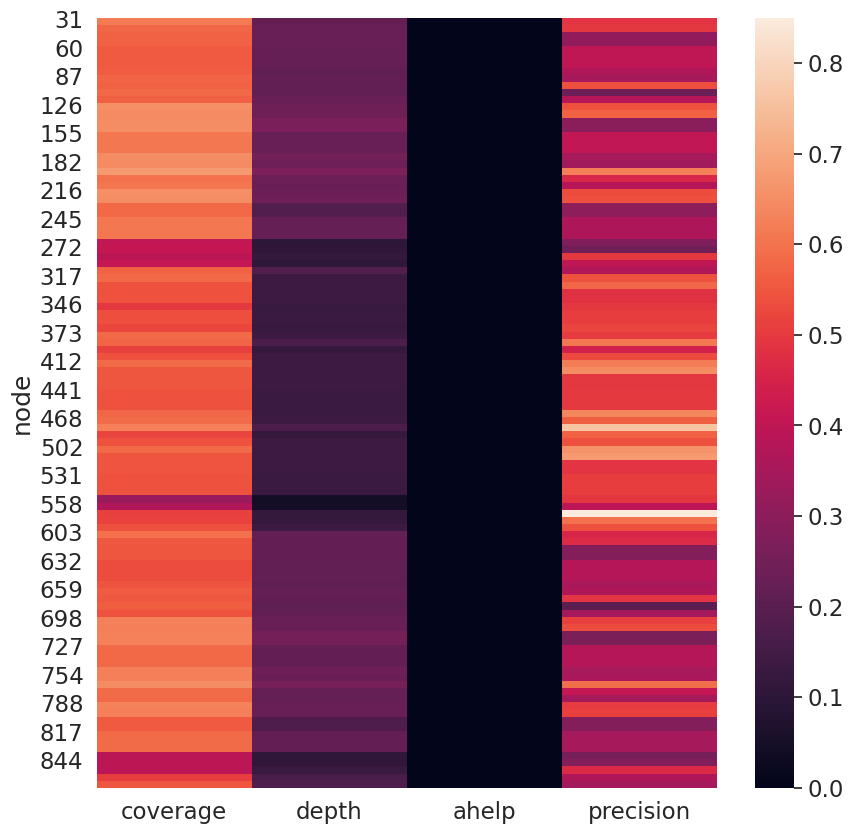

In [17]:
from modules.analysis_functions import plot_pipe_tree_heatmap, plot2heatmaps

cols_categorical= [
    "coverage",
    "depth",
    "ahelp",
    "precision",
]

pipe_tree_df_leaves= pipe_tree.get_leaves_df()
plot_pipe_tree_heatmap(pipe_tree_df_leaves, columns_to_plot= cols_categorical)


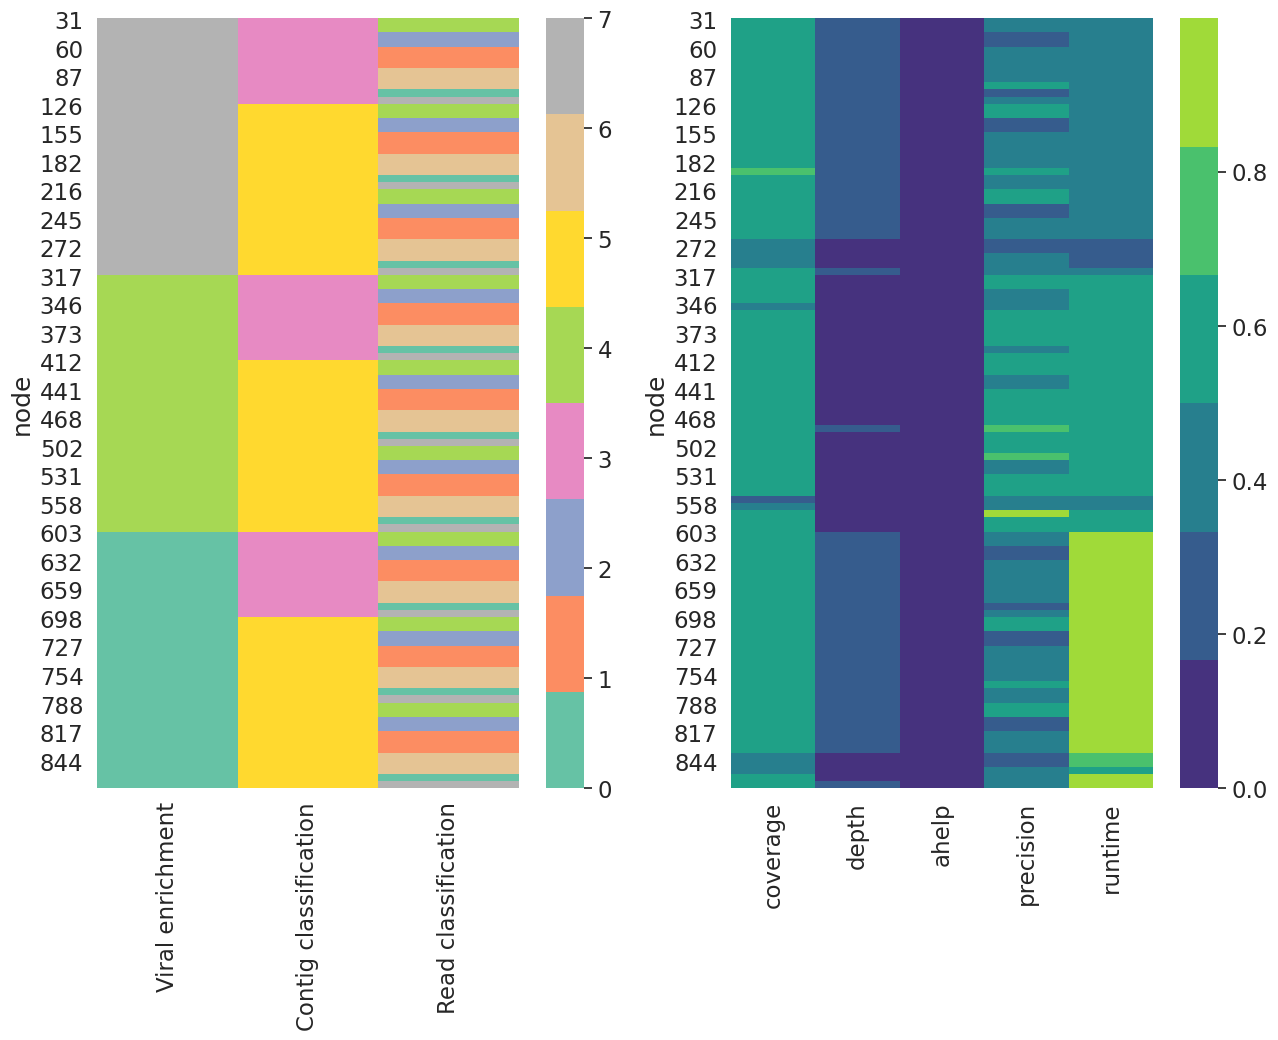

In [18]:

cols_numerical= [
    "coverage",
    "depth",
    "ahelp",
    "precision",
    "runtime"
]

col_enrichment= CS.PIPELINE_NAME_viral_enrichment
col_contig= CS.PIPELINE_NAME_contig_classification
col_read= CS.PIPELINE_NAME_read_classification

cols_categorical= [
    col_enrichment,
    col_contig,
    col_read,
]


##### selecting nodes by software

plot2heatmaps(pipe_tree, cols_categorical= cols_categorical, cols_numerical= cols_numerical)

- codes_ont= {'kaiju': 0,
 'centrifuge': 1,
 'blast': 2,
 'krakenuniq': 3,
 'kraken2': 4,
 'clark': 5,
 'minimap2': 6,
 'fastviromeexplorer': 7}

- codes_illumina = {'centrifuge': 0,
 'minimap2': 1,
 'kraken2': 2,
 'krakenuniq': 3,
 'blast': 4,
 'fastviromeexplorer': 5,
 'kaiju': 6,
 'clark': 7}


## Workflow Comparison

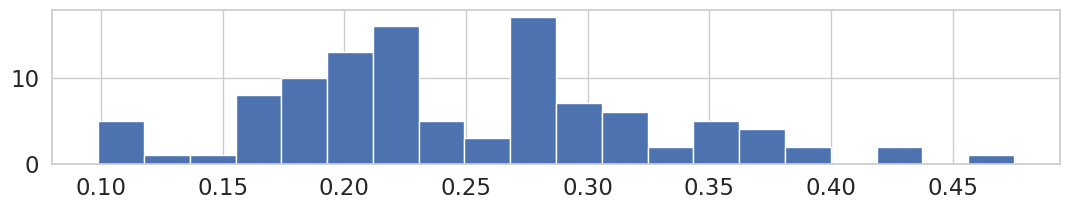

compressing tree


In [24]:
#from  modules.analysis_functions import plot_benchmark_tree, plot_workflow_boxplots
import numpy as np

internode_function=np.mean
stats=["precision", "coverage"]

plot_benchmark_tree(pipe_tree, internode_function=internode_function, stats=stats)

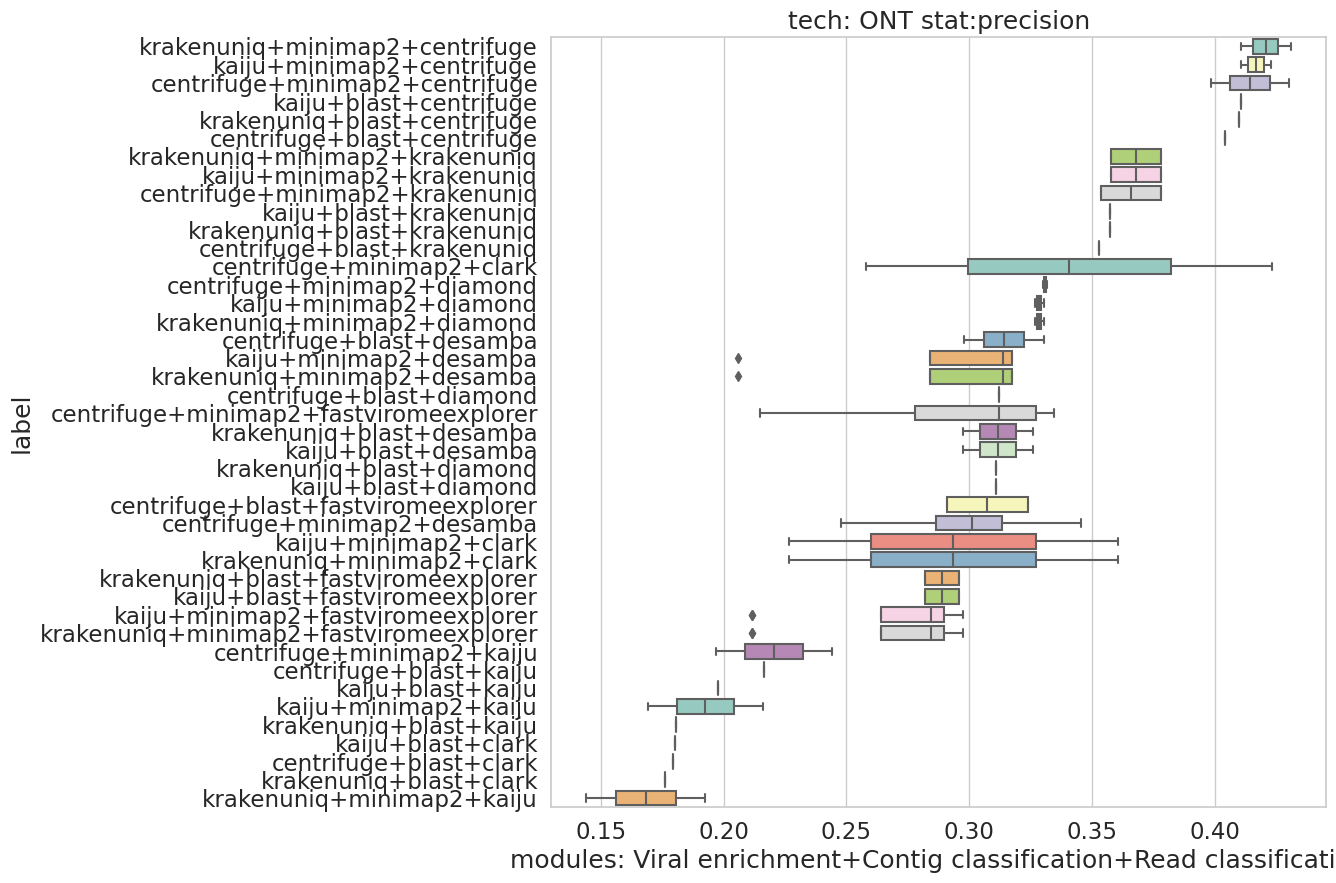

In [19]:
select_modules_dict= {
    CS.PIPELINE_NAME_viral_enrichment: ["kaiju", "centrifuge", "krakenuniq"],
    CS.PIPELINE_NAME_contig_classification: ["blast", "minimap2"],
    CS.PIPELINE_NAME_read_classification: ["kaiju", "centrifuge", "krakenuniq", "diamond", "desamba", "clark", "fastviromeexplorer"],
}

plot_workflow_boxplots(pipe_tree, stats= stats, select_modules_dict= select_modules_dict)

